In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
import string

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load Data

In [2]:
df = pd.read_csv("C:/Hamza/project kaggle/bg3_analysis/BG3_reviews_updated.csv") # read the dataset from pc
df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free
0,153560814,english,This game hits all the right marks. 10/10,1702542971,1702542971,True,0,0,0.0,False,0,True,False
1,153560623,english,took me like 11 hours to understand the basics,1702542657,1702542657,True,0,0,0.0,False,0,True,False
2,153560414,english,10/10 game play and story! It's my first turn ...,1702542275,1702542275,True,0,0,0.0,False,0,True,False
3,153560343,english,gale is so baby girl,1702542158,1702542158,True,0,0,0.0,False,0,True,False
4,153559963,english,"YES,\n\nWITHOUT A F****N DOUBT.",1702541518,1702541518,True,0,0,0.0,False,0,True,False


In [3]:
#negative review
df[df['voted_up'] == False].head() # print voted_up that are negativ

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,written_during_early_access,comment_count,steam_purchase,received_for_free
22,153557756,english,Yet another overhyped dogshit game. How can a...,1702537509,1702537509,False,0,0,0.478261,False,0,True,False
69,153554384,english,Continuously crashes after 5-10 minutes of gam...,1702531546,1702531546,False,0,0,0.476190,False,0,True,False
85,153552903,english,"It is a very fun game. however, my play throug...",1702529143,1702530325,False,0,0,0.000000,False,0,True,False
125,153549468,english,Firstly let me say this game will get a thumbs...,1702523972,1702523972,False,1,1,0.441064,False,0,True,False
130,153549025,english,Don't waste your time if you are planning on p...,1702523356,1702523356,False,1,0,0.500284,False,0,True,False


## Show differents stats

In [4]:
# print differents stats od the dataset
def stat_data(data):
    print("SHAPE".ljust(50, "#"))
    print("Rows : {}".format(data.shape[0]))
    print("Column : {}".format(data.shape[1]))
    
    print("\nTypes".ljust(50, "#"))
    print(data.dtypes)

    print("\nMissing Values".ljust(50, "#"))
    print(data.isnull().sum())
    
    print("\nDuplicate".ljust(50, "#"))
    print("Numer of duplicated values : {}".format(data.duplicated().sum()))
    
    print("\nDESCRIBE".ljust(50, "#"))
    print(data.describe().T)

stat_data(df)    

SHAPE#############################################
Rows : 309103
Column : 13

Types############################################
recommendationid                 int64
language                        object
review                          object
timestamp_created                int64
timestamp_updated                int64
voted_up                          bool
votes_up                         int64
votes_funny                      int64
weighted_vote_score            float64
written_during_early_access       bool
comment_count                    int64
steam_purchase                    bool
received_for_free                 bool
dtype: object

Missing Values###################################
recommendationid                  0
language                          0
review                         1017
timestamp_created                 0
timestamp_updated                 0
voted_up                          0
votes_up                          0
votes_funny                       0
weighted_vot

In [5]:
df = df.dropna() # drop all rows that 

In [6]:
# how many word for each review
word_counts = df['review'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0) # if return 0 if is null
word_counts.describe()

count    308086.000000
mean         37.497900
std          88.844909
min           0.000000
25%           4.000000
50%          12.000000
75%          34.000000
max        2286.000000
Name: review, dtype: float64

Plot des nb de mots par review

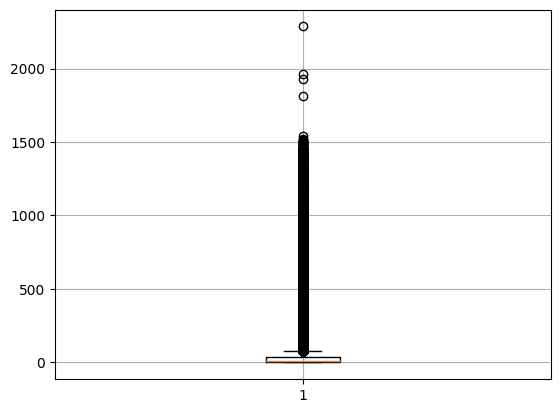

In [7]:
bx = plt.boxplot(word_counts.values)
plt.grid(True) # allow to show grid on plot
plt.show()

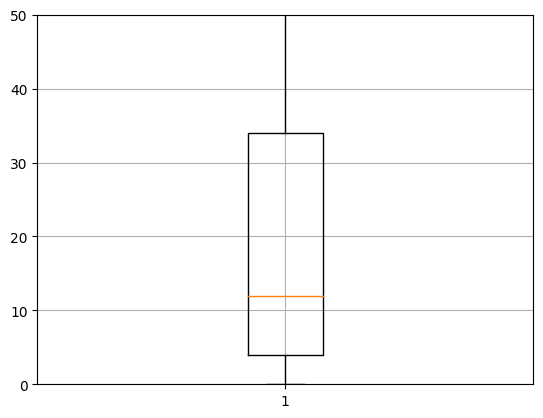

In [8]:
bx = plt.boxplot(word_counts.values)
plt.ylim(0, 50) # y goes from 0 to 50, don't show whats above
plt.grid(True)
plt.show()

# most of review between 4 and 34

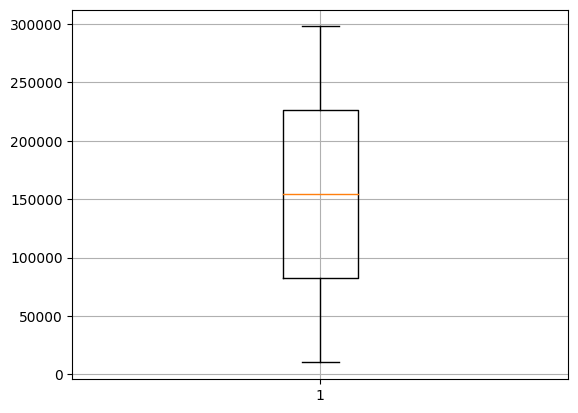

In [9]:
bx = plt.boxplot(df['voted_up'].value_counts())
plt.grid(True)
plt.show()

#not that usefull, cant get anything out of it

## Differents Plot to vizsualize data

Text(0.5, 1.0, 'Votes repartition')

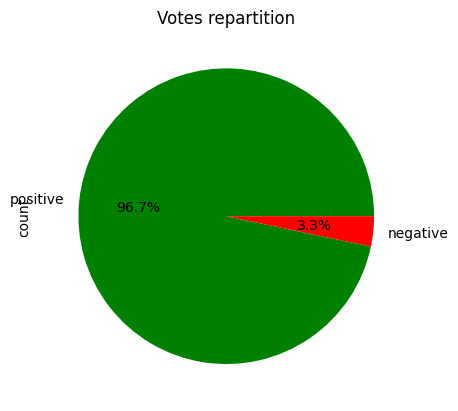

In [14]:
df['voted_up'].value_counts().plot(kind='pie', labels=['positive', 'negative'], colors=['green','red'], autopct='%.1f%%') # autocpt is how number are show
plt.title('Votes repartition')

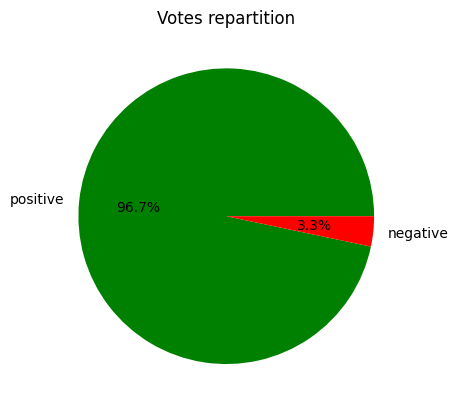

In [11]:
# prefer that way to plot
plt.pie(df['voted_up'].value_counts(), labels=['positive', 'negative'], colors=['green','red'], autopct='%.1f%%')
plt.title('Votes repartition')
plt.show()

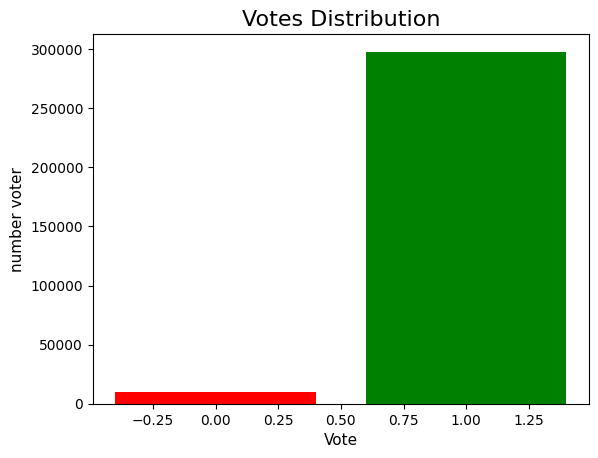

In [19]:
# Count the occurrences of each category
vote_counts = df['voted_up'].value_counts()

# Create a bar plot
plt.bar(vote_counts.index, vote_counts.values, color=['green', 'red'])
plt.xlabel('Vote', fontsize=11)
plt.ylabel('number voter', fontsize=11)
plt.title('Votes Distribution', fontsize=16)
plt.show()


In [17]:
vote_counts

voted_up
True     297929
False     10157
Name: count, dtype: int64

## function that plot are bar plot for most common word in a dataset

In [20]:
def plot_common_words(df, label, review, title):
    # Filtrer le DataFrame en fonction du label donné
    filtered_reviews = df[df['voted_up'] == label][review]
    
    # Concaténer toutes les critiques en une seule chaîne
    all_reviews = ' '.join(filtered_reviews)
    
    # Tokenisation des mots
    tokens = nltk.word_tokenize(all_reviews)
    
    # Suppression de la ponctuation des tokens
    tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]


    # Calcul de la fréquence des mots
    freq_dist = nltk.FreqDist(tokens_without_punctuation)
    common_words = freq_dist.most_common(20)  # Les 10 mots les plus courants
    
    # Création du graphique à barres des mots les plus courants
    words, frequencies = zip(*common_words)
    plt.figure(figsize=(15,25))
    plt.barh(words, frequencies, color='blue')
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.title(f'{title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return common_words

## Fonction de preprocessing / cleaning de données

In [24]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hamouZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


creating a new column containing cleaned review

In [25]:
# On applique le pré-traitement à nos données
df['preprocessed_review'] = df['review'].apply(lambda review : data_preprocessing(review))
df['preprocessed_review'].head()

0                            game hit right mark 10 10
1                   took like 11 hour understand basic
2    10 10 game play story first turn based rpg gam...
3                                       gale baby girl
4                                yes without f n doubt
Name: preprocessed_review, dtype: object

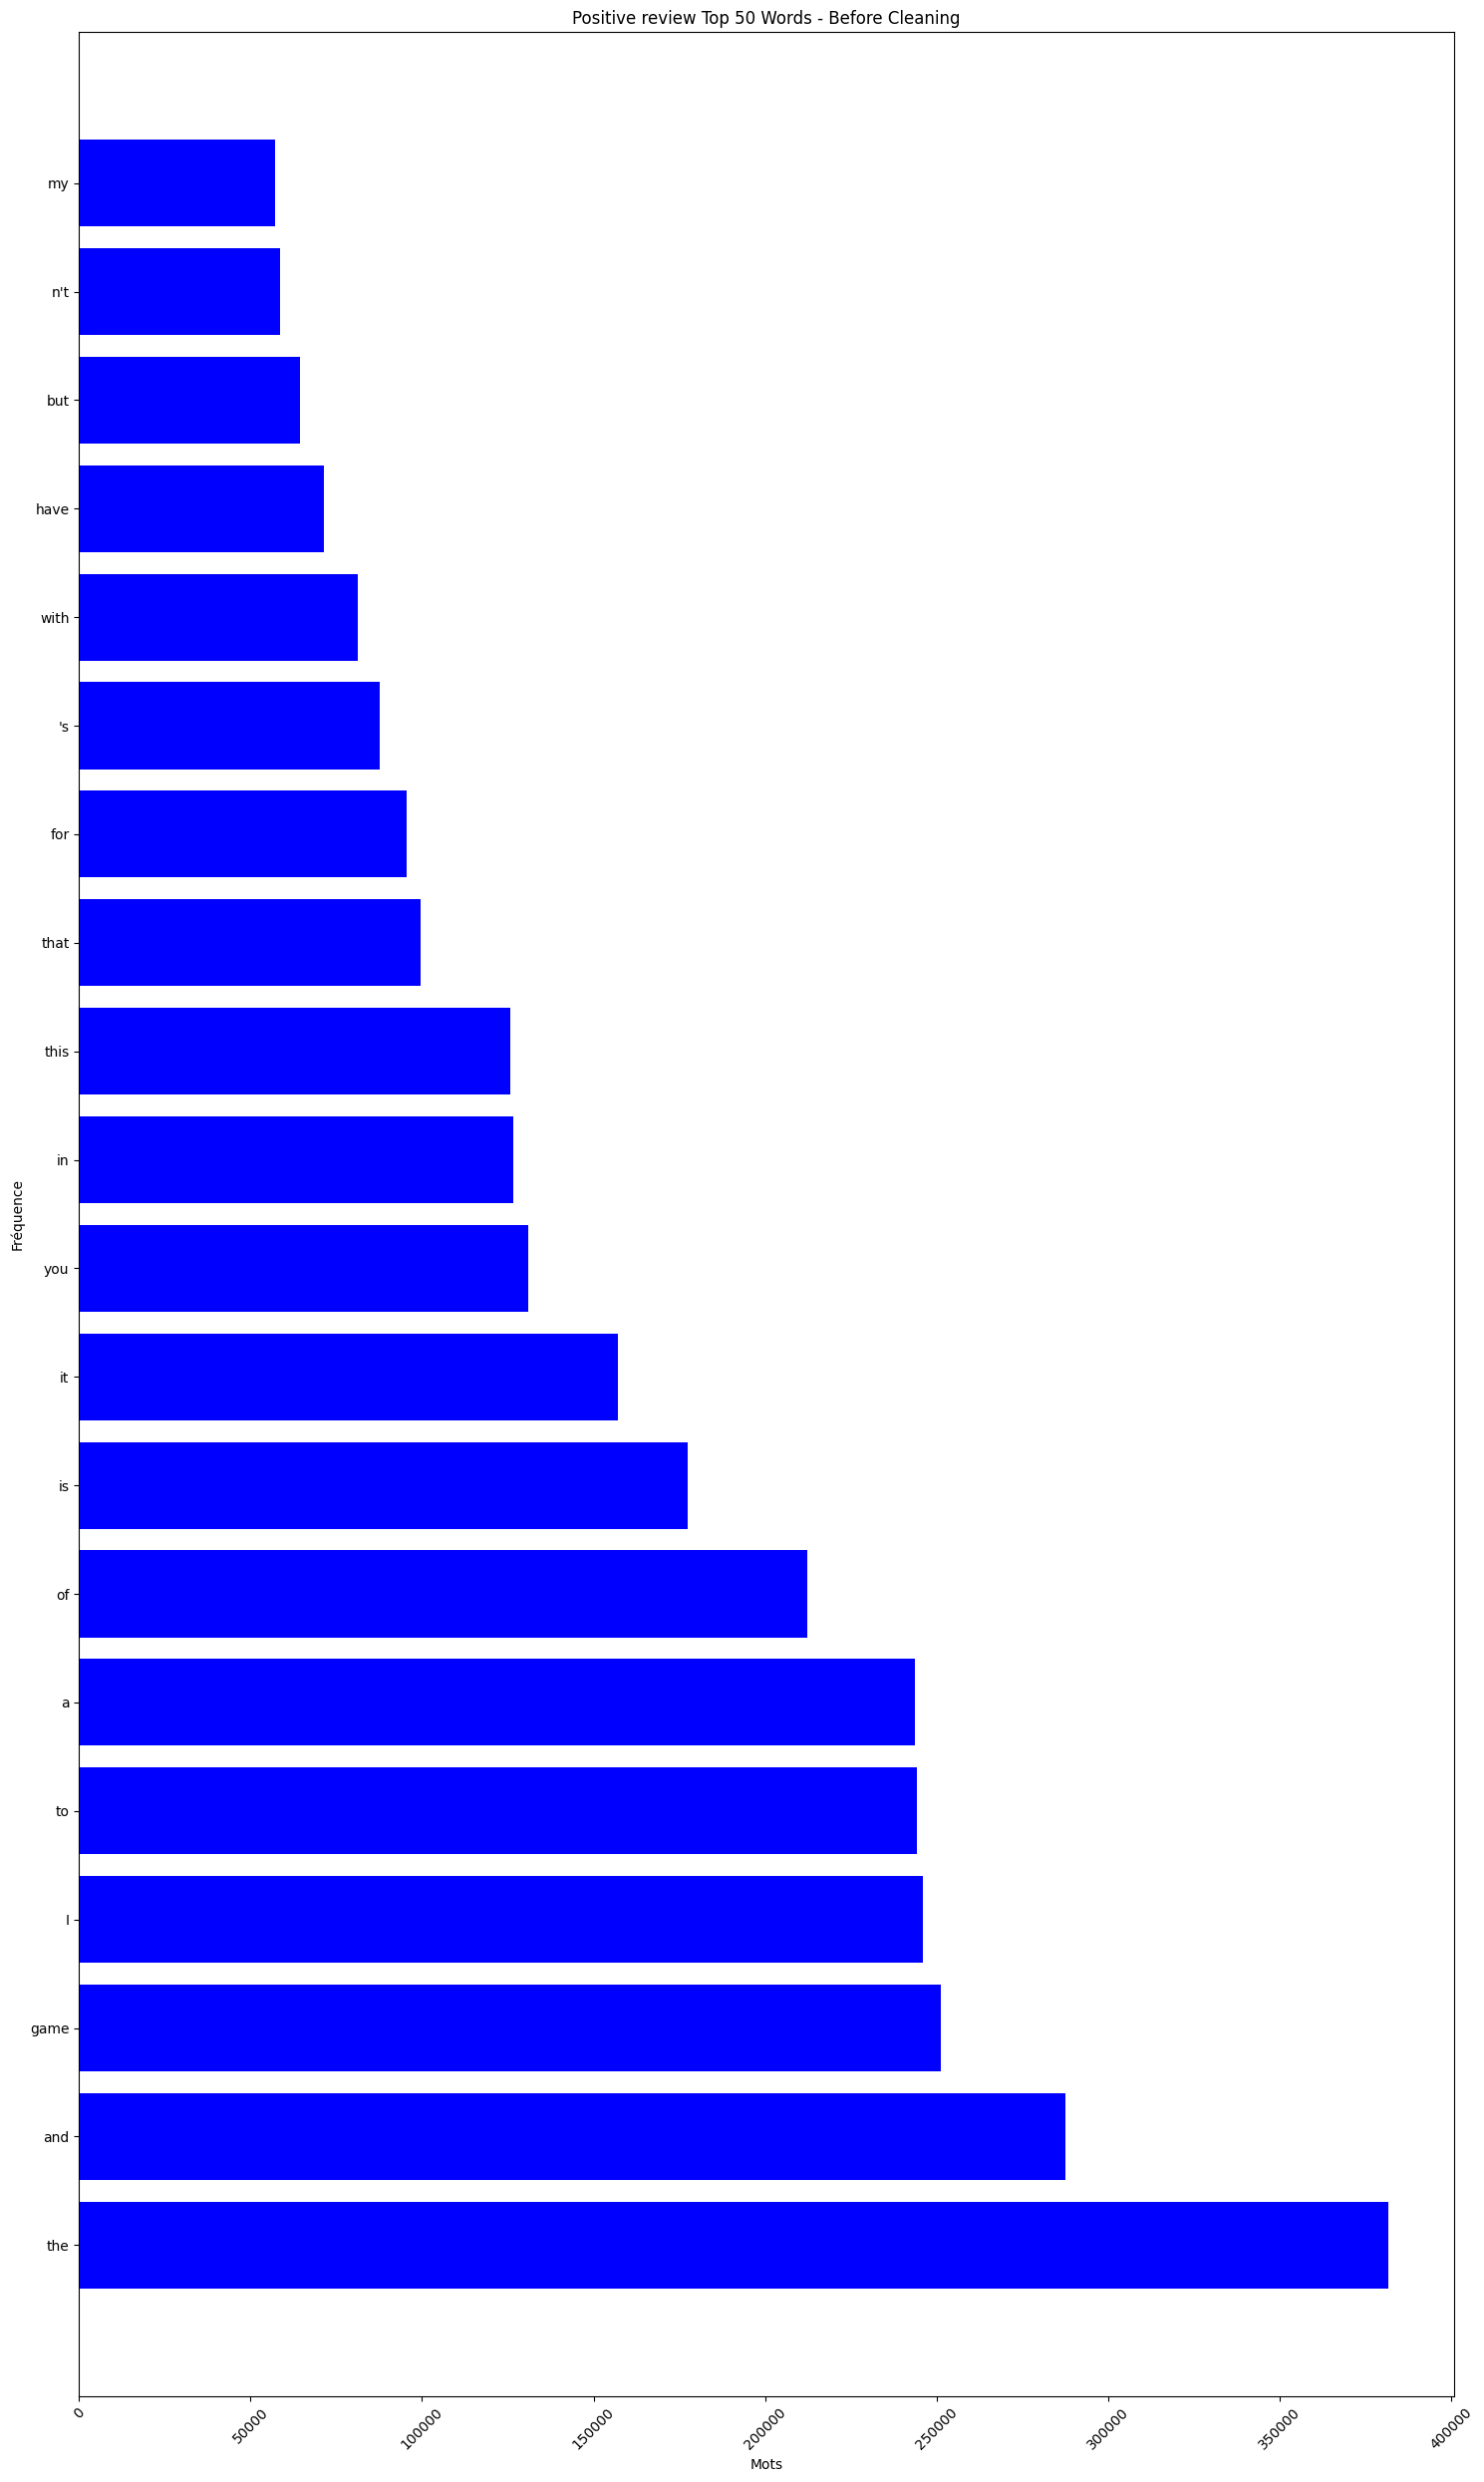

In [181]:
# Use plot function with chosen column
b1 = plot_common_words(df, 1, 'review', 'Positive review Top 50 Words - Before Cleaning')  # Pour les mots les plus courants dans les critiques positives

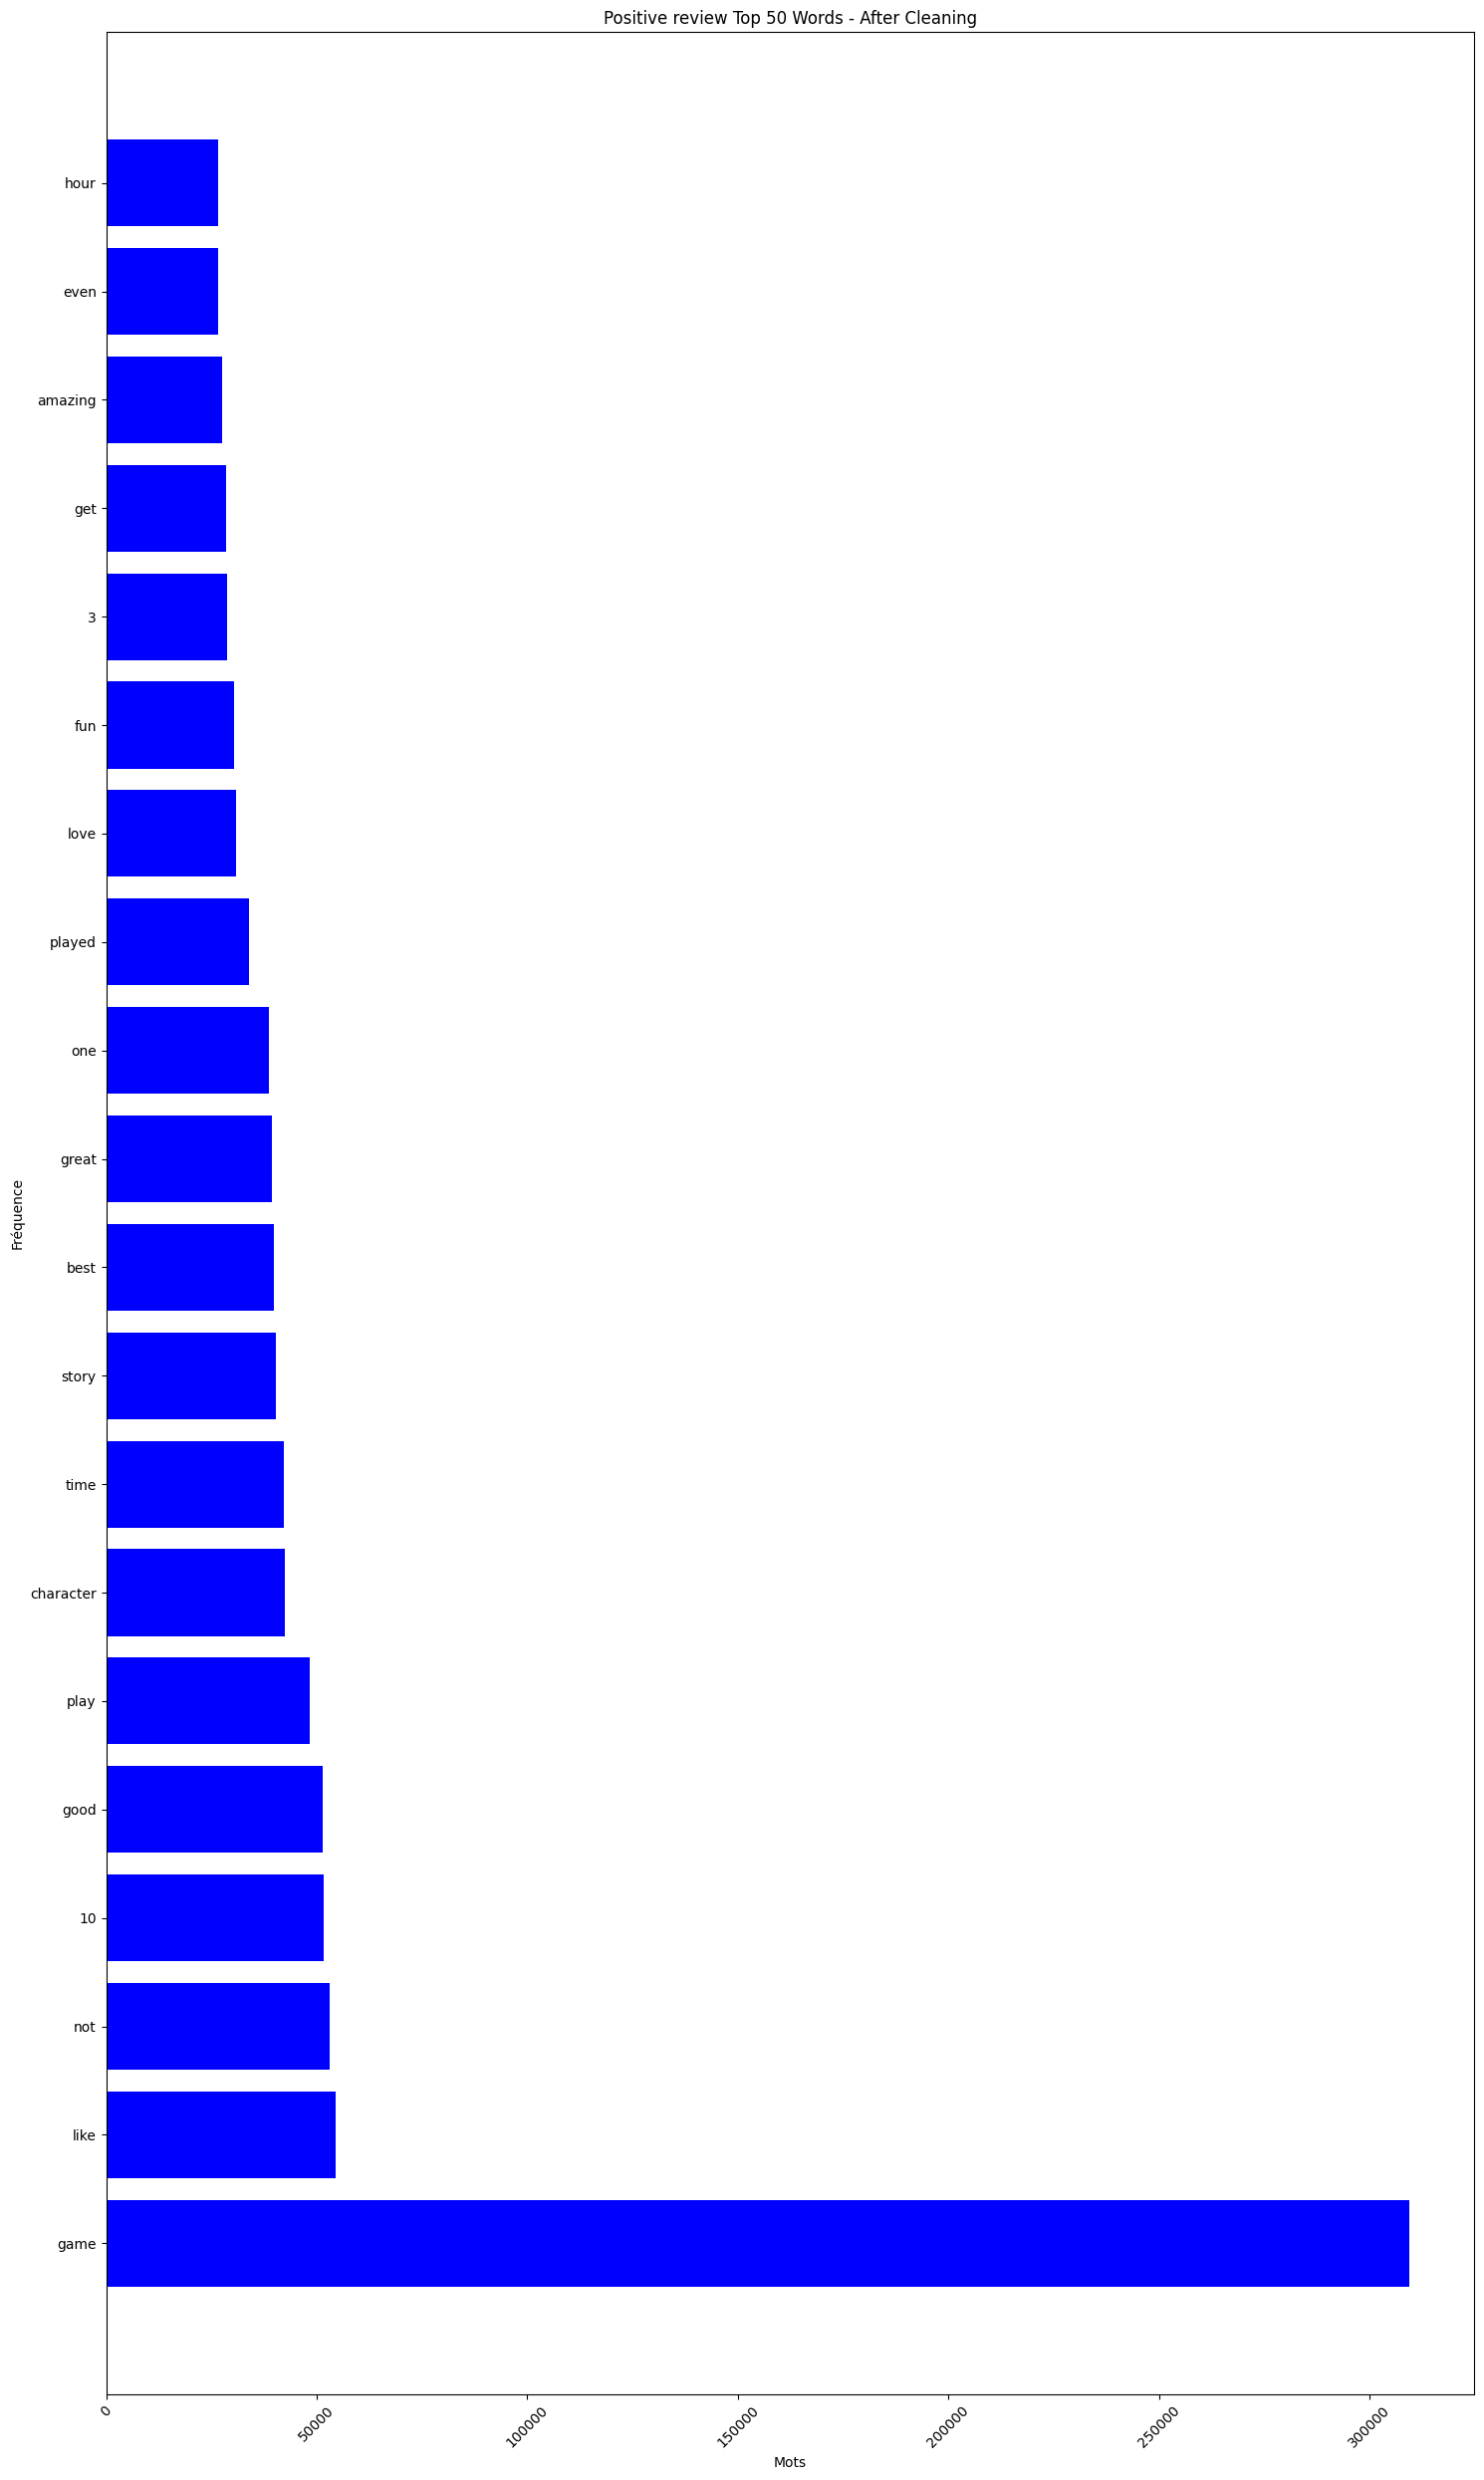

In [182]:
a1 = plot_common_words(df, 1, 'preprocessed_review', 'Positive review Top 50 Words - After Cleaning')  # Pour les mots les plus courants dans les critiques négatives

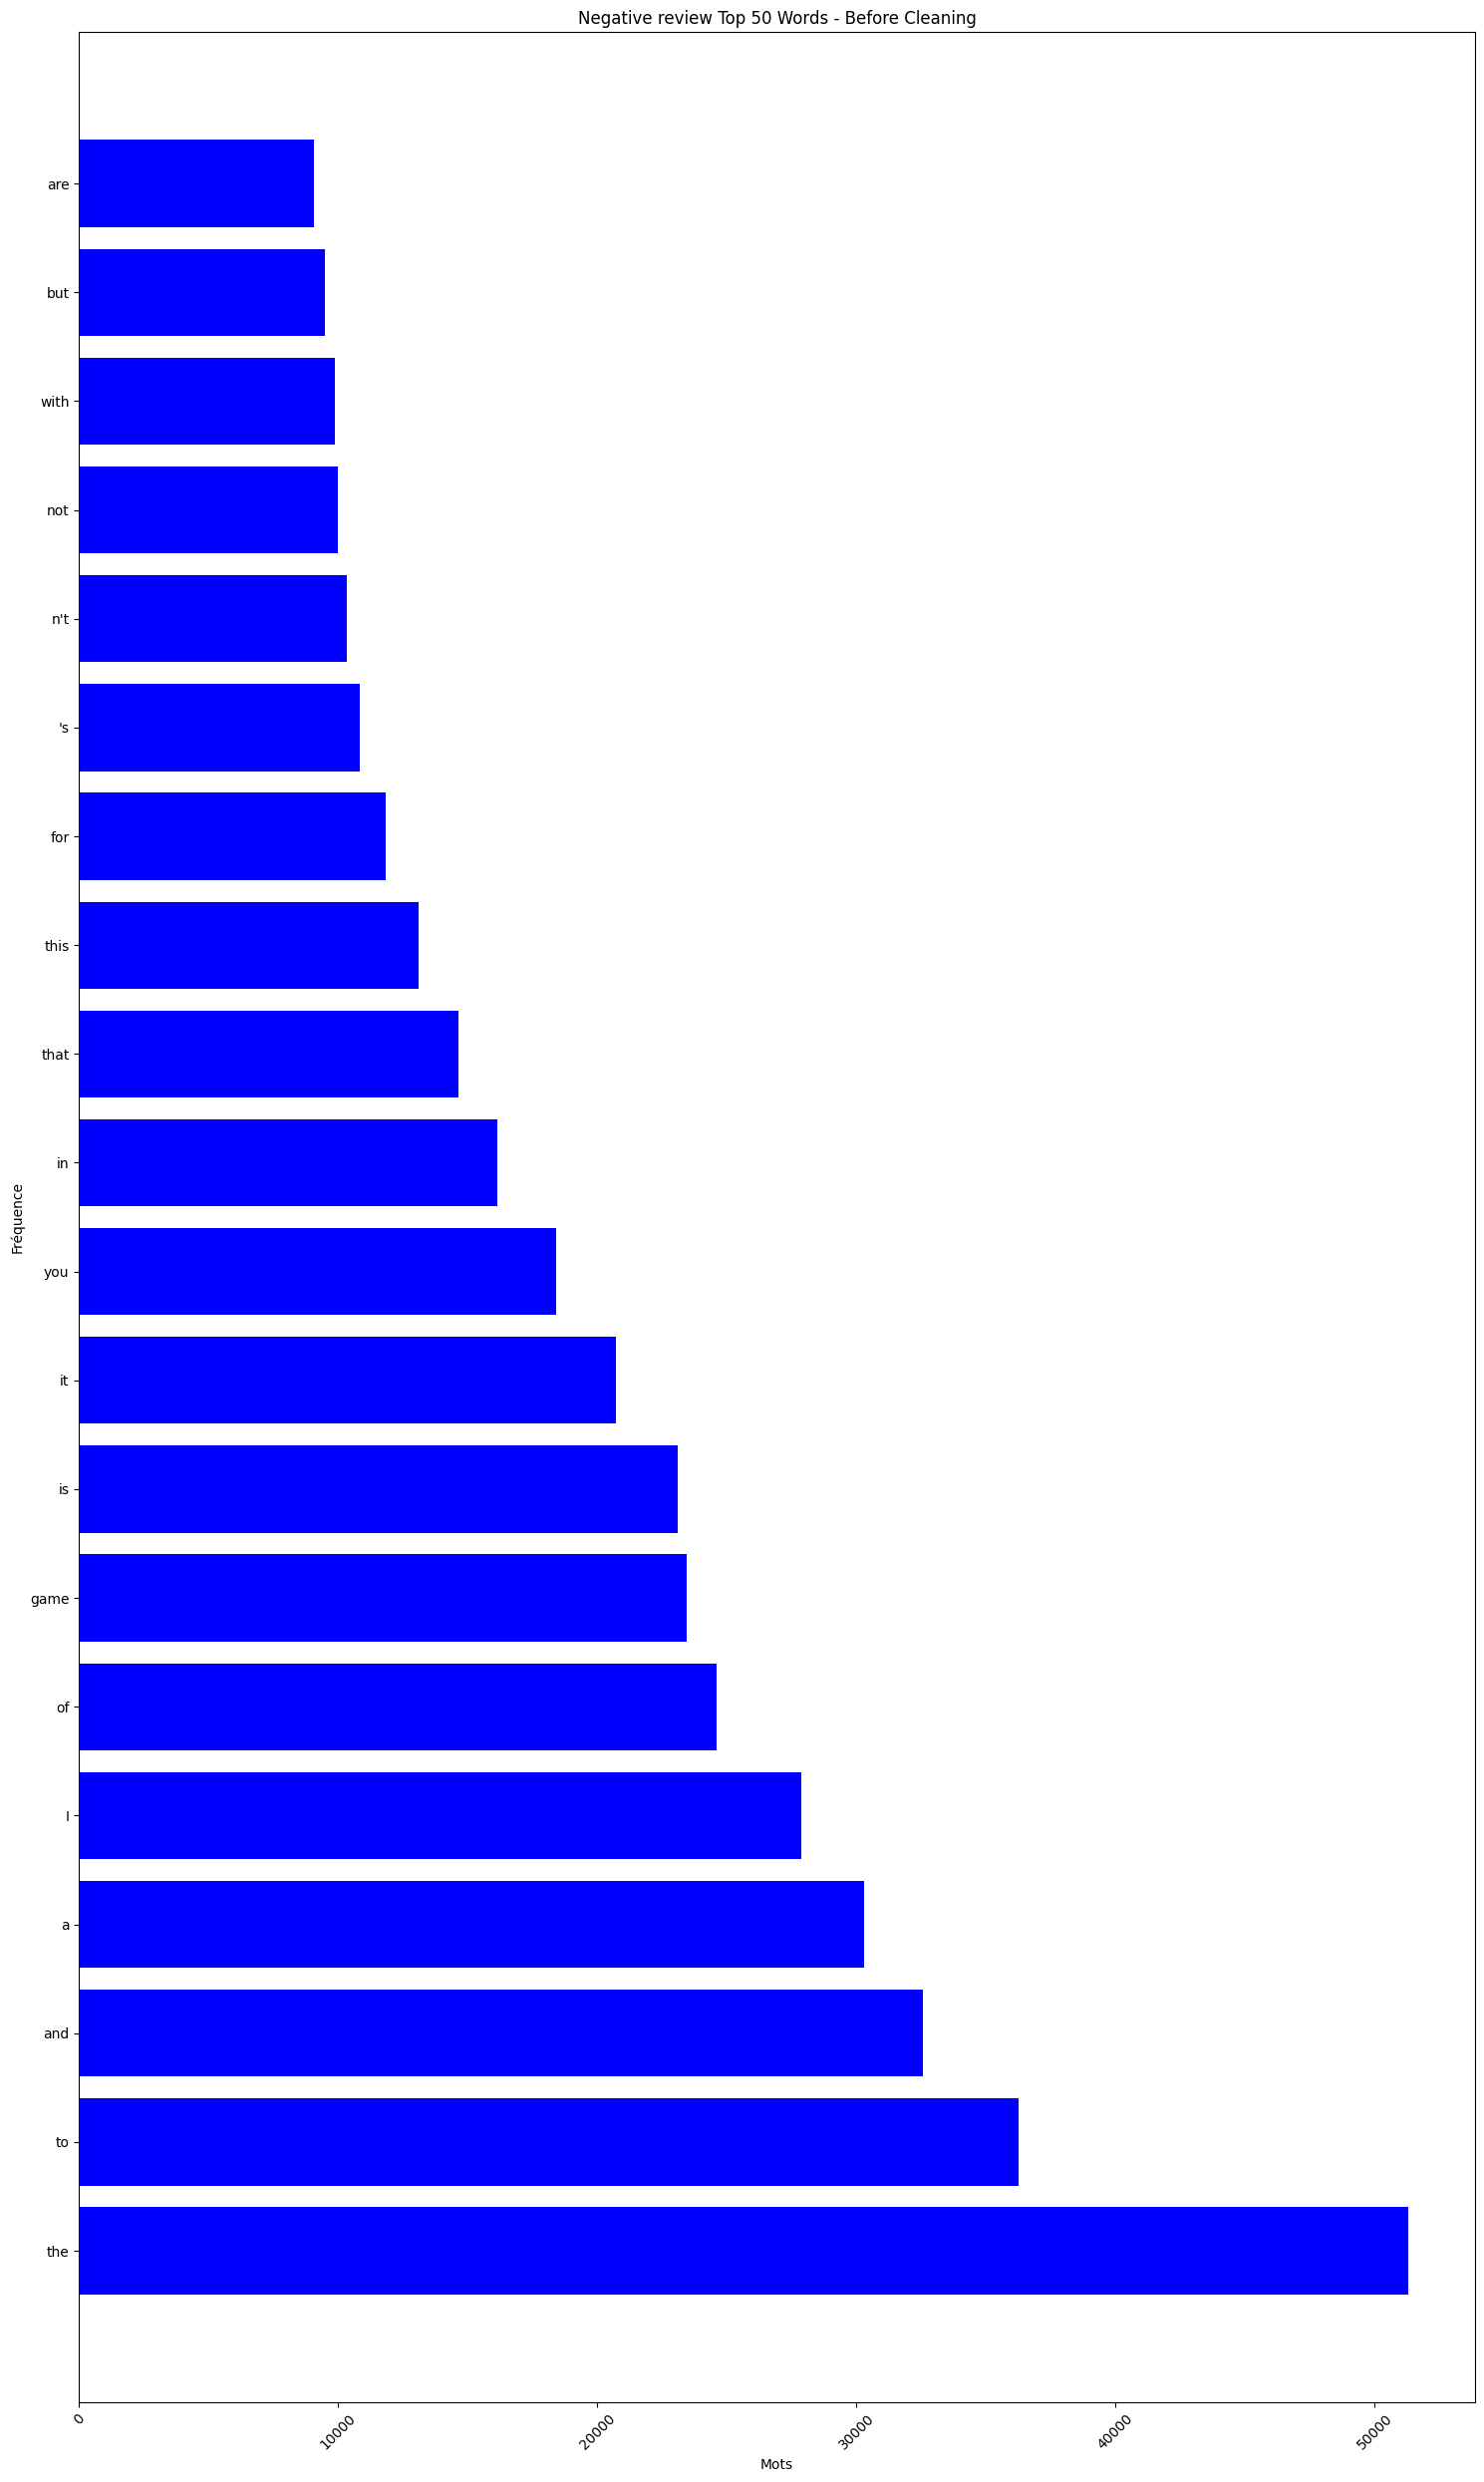

In [183]:
b2 = plot_common_words(df, 0, 'review', 'Negative review Top 50 Words - Before Cleaning')  # Pour les mots les plus courants dans les critiques négatives

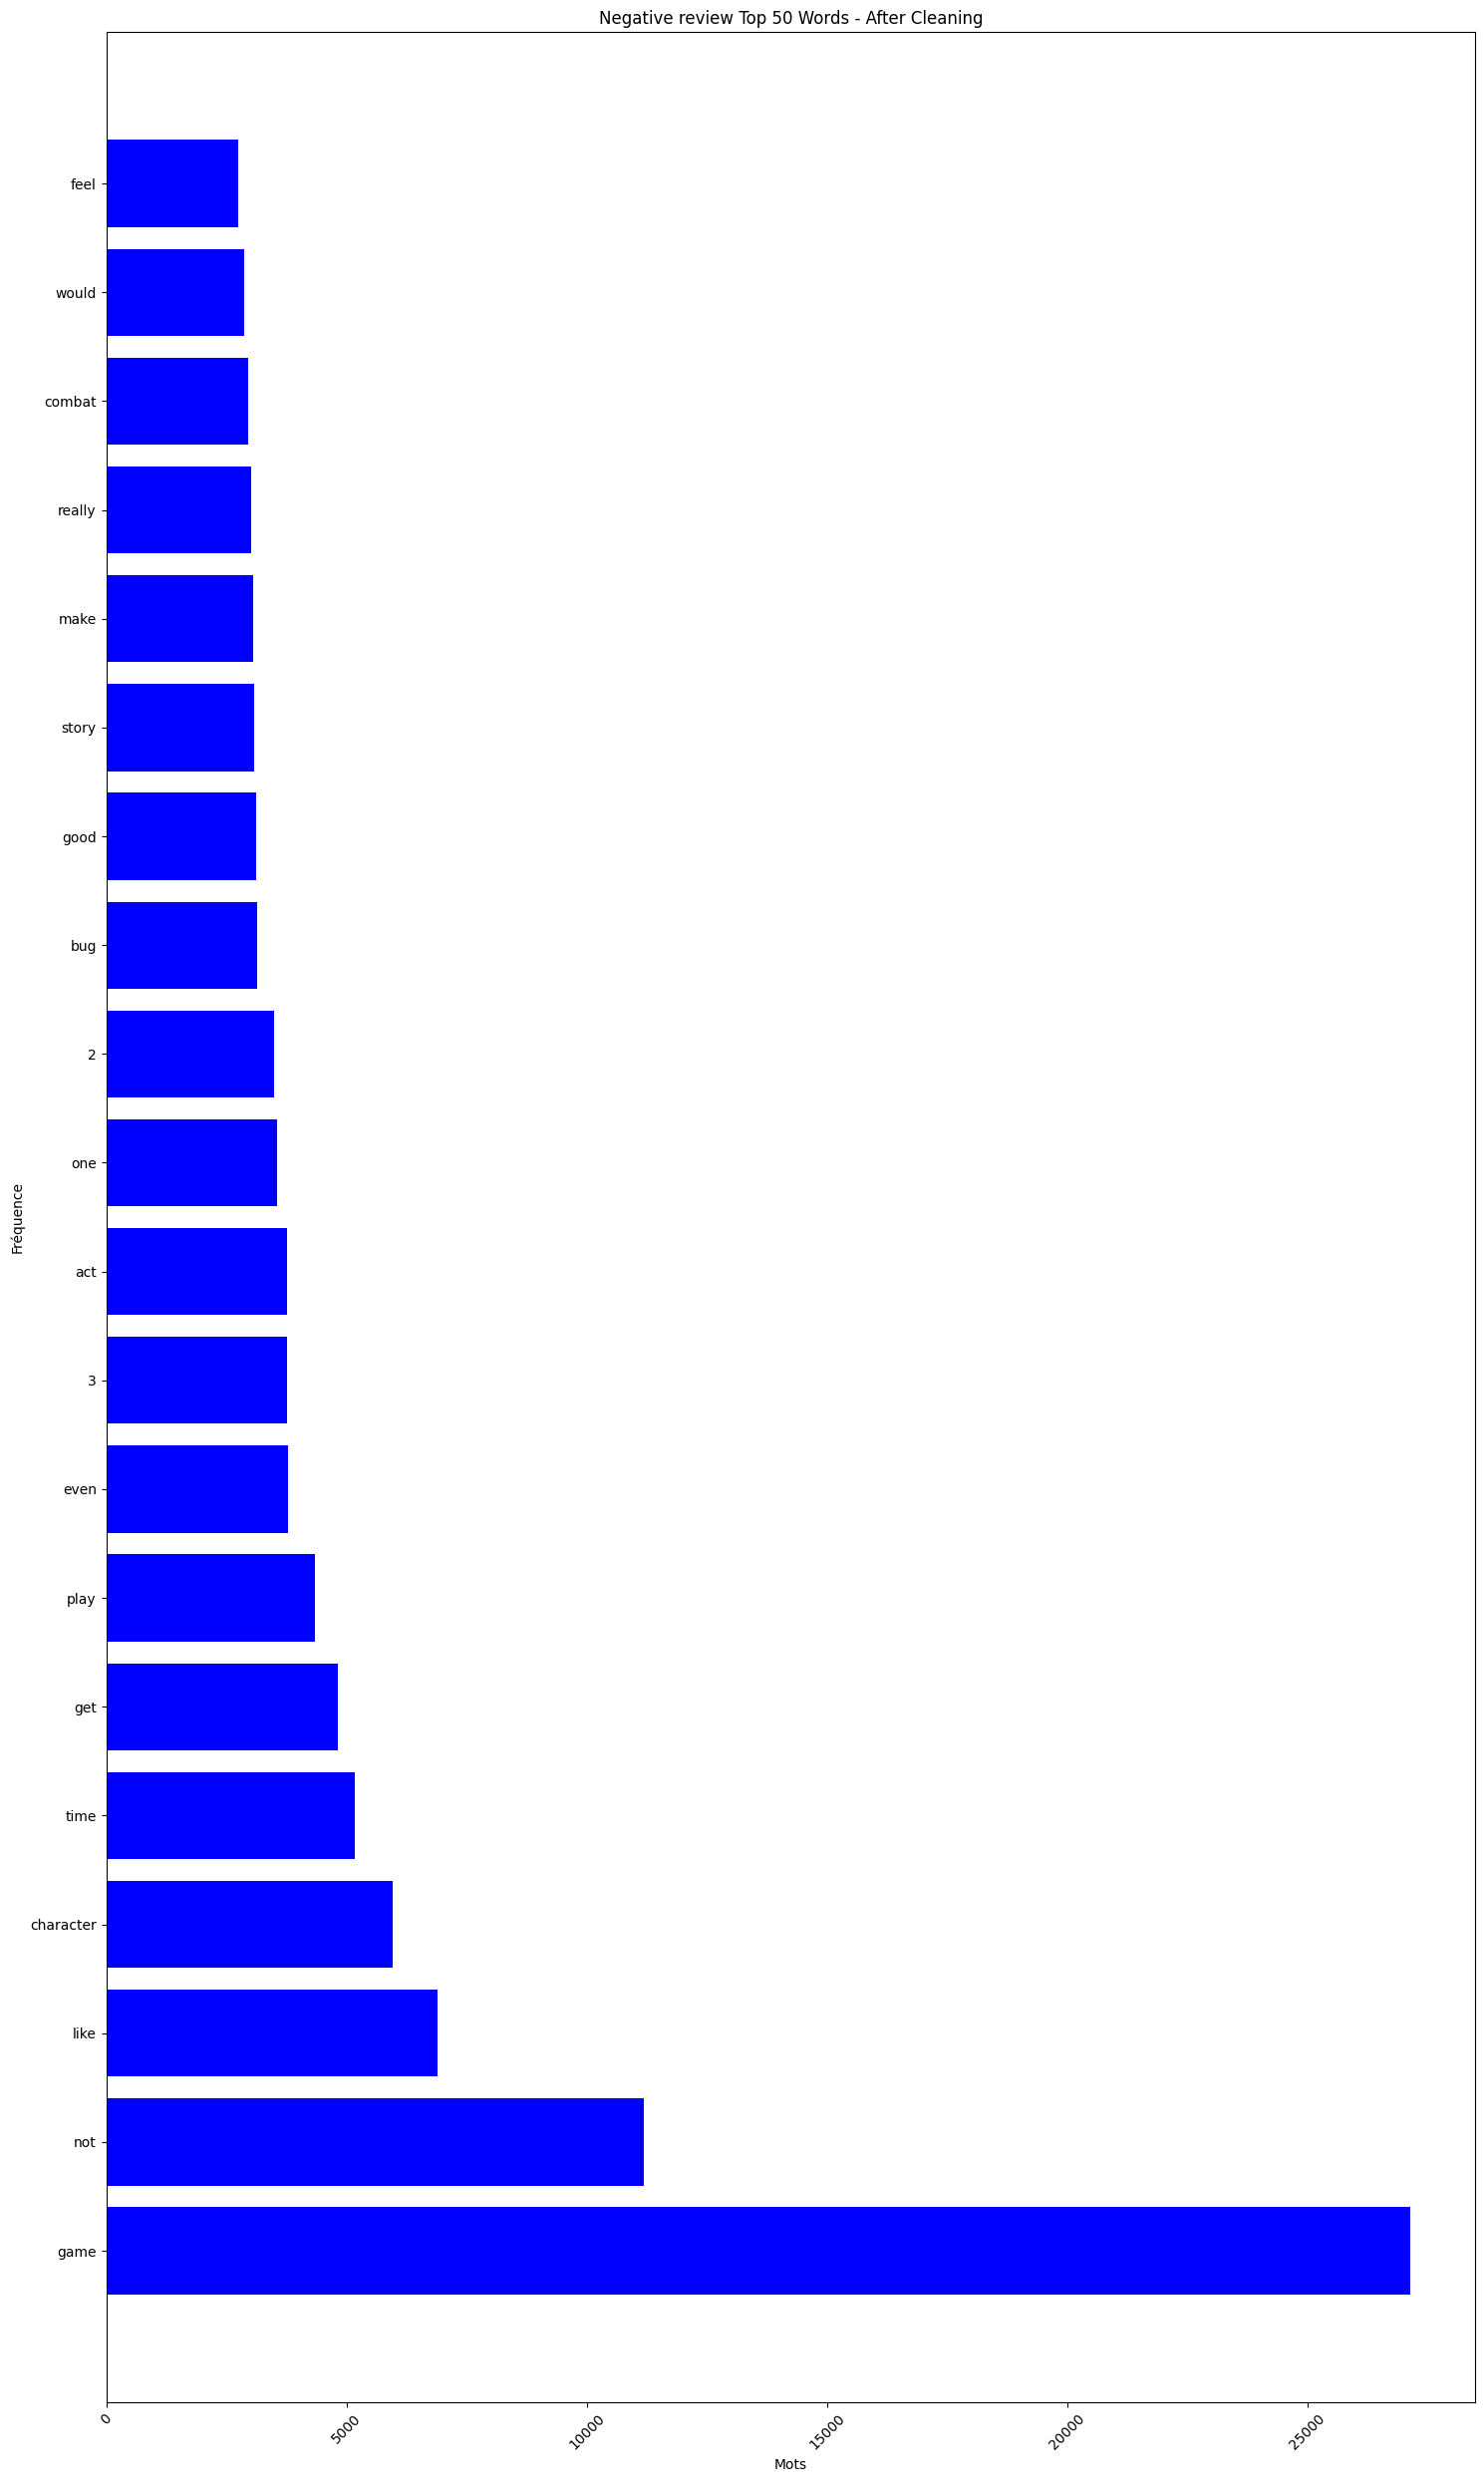

In [184]:
a2 = plot_common_words(df, 0, 'preprocessed_review', 'Negative review Top 50 Words - After Cleaning')  # Pour les mots les plus courants dans les critiques négatives

In [185]:
print(dict(b1))

{'the': 381657, 'and': 287511, 'game': 251312, 'I': 245954, 'to': 244230, 'a': 243786, 'of': 212406, 'is': 177358, 'it': 157099, 'you': 130811, 'in': 126461, 'this': 125838, 'that': 99488, 'for': 95366, "'s": 87615, 'with': 81358, 'have': 71396, 'but': 64342, "n't": 58593, 'my': 57092}


## WordCloud Plot

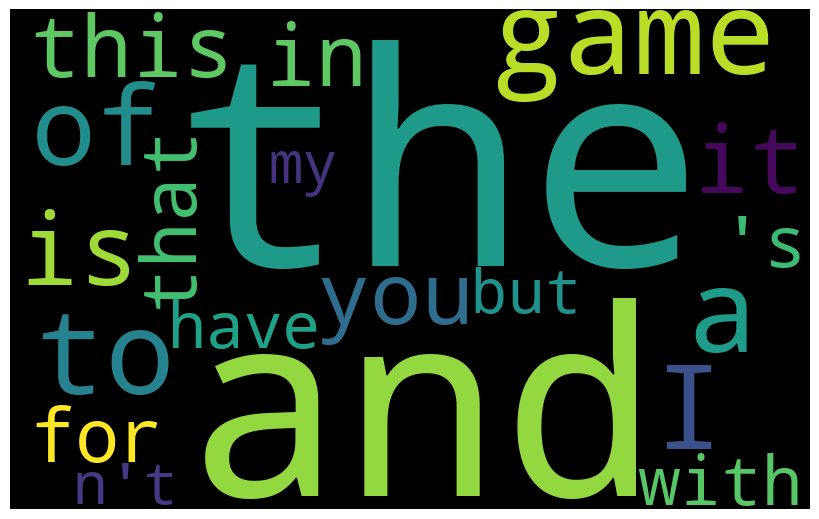

In [186]:
from wordcloud import WordCloud

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate_from_frequencies(dict(b1))

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

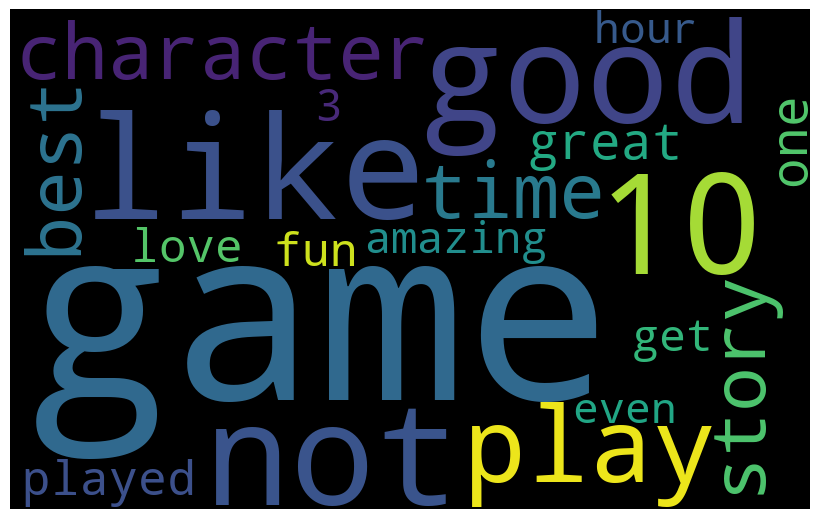

In [187]:
from wordcloud import WordCloud

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate_from_frequencies(dict(a1))

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Train / Test split

In [26]:
from sklearn.model_selection import train_test_split

data = df[['preprocessed_review', 'voted_up']]
x = data['preprocessed_review']
y = data['voted_up'].values

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y)


print("Train data:",  X_train.shape, Y_train.shape)
print("Test data:",  X_test.shape, Y_test.shape)

Train data: (246468,) (246468,)
Test data: (61618,) (61618,)


## Bag-Of-Words (BOW) and TF-IDF transformation

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=10)

X_train_review_bow = cv.fit_transform(X_train)
X_test_review_bow = cv.transform(X_test)

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (246468, 11836)
X_test_review_bow shape:  (61618, 11836)


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10)

X_train_review_tfidf = tfidf.fit_transform(X_train)
X_test_review_tfidf = tfidf.transform(X_test)

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (246468, 11836)
X_test_review_tfidf shape:  (61618, 11836)


## BOW + MultinomailNB

In [29]:
# On entraîne un Naive Bayes sur les données
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb_bow_train_start = time.time()
mnb.fit(X_train_review_bow, Y_train)
mnb_bow_train_end = time.time()
mnb_bow_train_time = mnb_bow_train_end - mnb_bow_train_start
print("bow + mnb train time : {:.4f}s".format(mnb_bow_train_time))


# Test accuracy
mnb_bow_train_pred = mnb.predict(X_train_review_bow) 
mnb_bow_predict_start = time.time()
mnb_bow_test_pred = mnb.predict(X_test_review_bow) # prediction from model
mnb_bow_predict_end = time.time()
mnb_bow_test_time = mnb_bow_predict_end - mnb_bow_predict_start
mnb_bow_train_score = round(accuracy_score(Y_train, mnb_bow_train_pred), 4)
mnb_bow_test_score = round(accuracy_score(Y_test, mnb_bow_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(mnb_bow_train_score*100))
print('Test Accuracy: {:.2f}%'.format(mnb_bow_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(mnb_bow_test_time))

bow + mnb train time : 0.0462s
Train Accuracy: 96.38%
Test Accuracy: 96.29%
bow + mnb predict time : 0.0072s


In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score

mnb_bow_precision_score = precision_score(Y_test, mnb_bow_test_pred)
mnb_bow_f1_score = f1_score(Y_test, mnb_bow_test_pred)
mnb_bow_recall_score = recall_score(Y_test, mnb_bow_test_pred)
mnb_bow_accuracy_score = accuracy_score(Y_test, mnb_bow_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(mnb_bow_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(mnb_bow_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(mnb_bow_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(mnb_bow_accuracy_score*100))

bow + mnb Precision Score = 98.55%
bow + mnb f1 score = 98.07%
bow + mnb recall score = 97.59%
bow + mnb accuracy score = 96.29%


In [31]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, mnb_bow_test_pred))

              precision    recall  f1-score   support

       False       0.45      0.58      0.51      2031
        True       0.99      0.98      0.98     59587

    accuracy                           0.96     61618
   macro avg       0.72      0.78      0.74     61618
weighted avg       0.97      0.96      0.97     61618



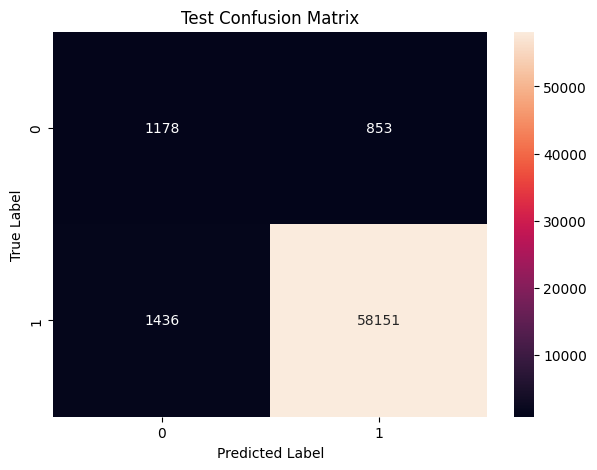

In [39]:
# Regardons la matrice de confusion
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, mnb_bow_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d') #annot allows notation   fmt='d' stand for integer
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

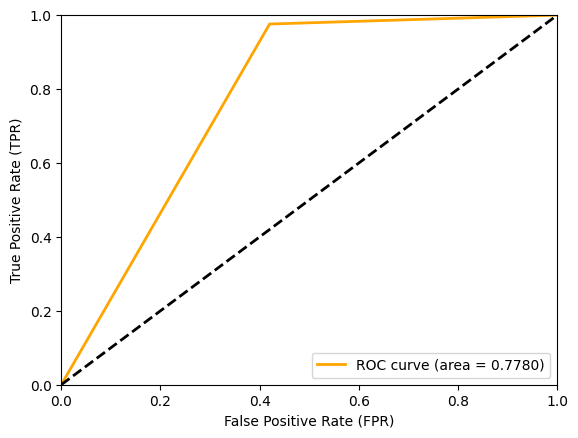

In [40]:
from sklearn.metrics import auc, roc_curve


fpr, tpr, _ = roc_curve(Y_test, mnb_bow_test_pred) # fpr: array of false positive rates / tpr: An array of true positive rates
mnb_bow_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label="ROC curve (area = {:.4f})".format(mnb_bow_roc_auc ))
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--") # ln stand for linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## TFIDF + MultinomailNB

In [197]:
mnb = MultinomialNB()
mnb_tfidf_train_start = time.time()
mnb.fit(X_train_review_tfidf, Y_train)
mnb_tfidf_train_end = time.time()
mnb_tfidf_train_time = mnb_tfidf_train_end - mnb_tfidf_train_start
print("bow + mnb train time : {:.4f}s".format(mnb_tfidf_train_time))

# Test accuracy
mnb_tfidf_train_pred = mnb.predict(X_train_review_tfidf) 
mnb_tfidf_predict_start = time.time()
mnb_tfidf_test_pred = mnb.predict(X_test_review_tfidf) # prediction from model
mnb_tfidf_predict_end = time.time()
mnb_tfidf_test_time = mnb_tfidf_predict_end - mnb_tfidf_predict_start

mnb_tfidf_train_score = round(accuracy_score(Y_train, mnb_tfidf_train_pred), 4)
mnb_tfidf_test_score = round(accuracy_score(Y_test, mnb_tfidf_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(mnb_tfidf_train_score*100))
print('Test Accuracy: {:.2f}%'.format(mnb_tfidf_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(mnb_tfidf_test_time))

bow + mnb train time : 0.0481s
Train Accuracy: 97.00%
Test Accuracy: 96.93%
bow + mnb predict time : 0.0056s


In [198]:
mnb_tfidf_precision_score = precision_score(Y_test, mnb_tfidf_test_pred)
mnb_tfidf_f1_score = f1_score(Y_test, mnb_tfidf_test_pred)
mnb_tfidf_recall_score = recall_score(Y_test, mnb_tfidf_test_pred)
mnb_tfidf_accuracy_score = accuracy_score(Y_test, mnb_tfidf_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(mnb_tfidf_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(mnb_tfidf_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(mnb_tfidf_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(mnb_tfidf_accuracy_score*100))

bow + mnb Precision Score = 97.19%
bow + mnb f1 score = 98.43%
bow + mnb recall score = 99.71%
bow + mnb accuracy score = 96.93%


In [199]:
print(classification_report(Y_test, mnb_tfidf_test_pred))

              precision    recall  f1-score   support

       False       0.64      0.16      0.25      2031
        True       0.97      1.00      0.98     59587

    accuracy                           0.97     61618
   macro avg       0.81      0.58      0.62     61618
weighted avg       0.96      0.97      0.96     61618



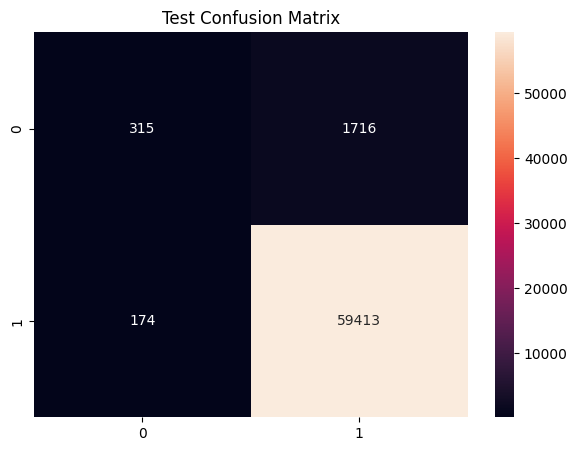

In [200]:
cm = confusion_matrix(Y_test, mnb_tfidf_test_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

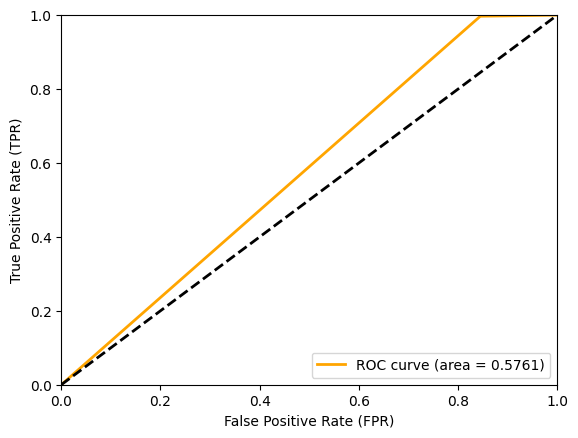

In [201]:
fpr, tpr, _ = roc_curve(Y_test, mnb_tfidf_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
mnb_tfidf_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {mnb_tfidf_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## BOW + Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_bow_train_start = time.time()
rf.fit(X_train_review_bow, Y_train)
rf_bow_train_end = time.time()
rf_bow_train_time = rf_bow_train_end - rf_bow_train_start
print("bow + mnb train time : {:.4f}s".format(rf_bow_train_time))


# Test accuracy
rf_bow_train_pred = rf.predict(X_train_review_bow) 
rf_bow_predict_start = time.time()
rf_bow_test_pred = rf.predict(X_test_review_bow) # prediction from model
rf_bow_predict_end = time.time()
rf_bow_test_time = rf_bow_predict_end - rf_bow_predict_start

rf_bow_train_score = round(accuracy_score(Y_train, rf_bow_train_pred), 4)
rf_bow_test_score = round(accuracy_score(Y_test, rf_bow_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(rf_bow_train_score*100))
print('Test Accuracy: {:.2f}%'.format(rf_bow_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(rf_bow_test_time))

bow + mnb train time : 589.4777s
Train Accuracy: 99.89%
Test Accuracy: 96.74%
bow + mnb predict time : 5.7730s


In [205]:
rf_bow_precision_score = precision_score(Y_test, rf_bow_test_pred)
rf_bow_f1_score = f1_score(Y_test, rf_bow_test_pred)
rf_bow_recall_score = recall_score(Y_test, rf_bow_test_pred)
rf_bow_accuracy_score = accuracy_score(Y_test, rf_bow_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(rf_bow_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(rf_bow_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(rf_bow_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(rf_bow_accuracy_score*100))

bow + mnb Precision Score = 96.94%
bow + mnb f1 score = 98.34%
bow + mnb recall score = 99.78%
bow + mnb accuracy score = 96.74%


In [206]:
print(classification_report(Y_test, rf_bow_test_pred))

              precision    recall  f1-score   support

       False       0.54      0.08      0.13      2031
        True       0.97      1.00      0.98     59587

    accuracy                           0.97     61618
   macro avg       0.75      0.54      0.56     61618
weighted avg       0.96      0.97      0.96     61618



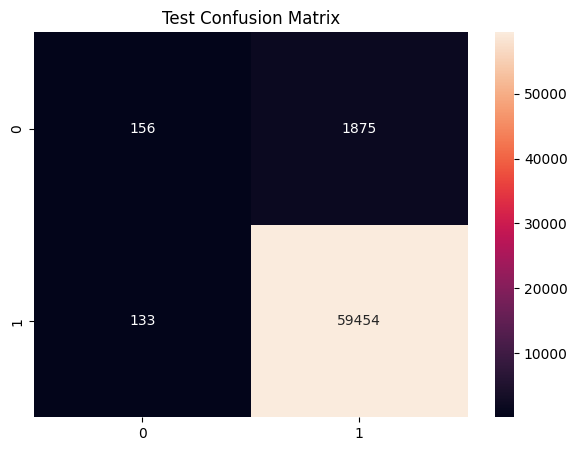

In [207]:
cm = confusion_matrix(Y_test, rf_bow_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

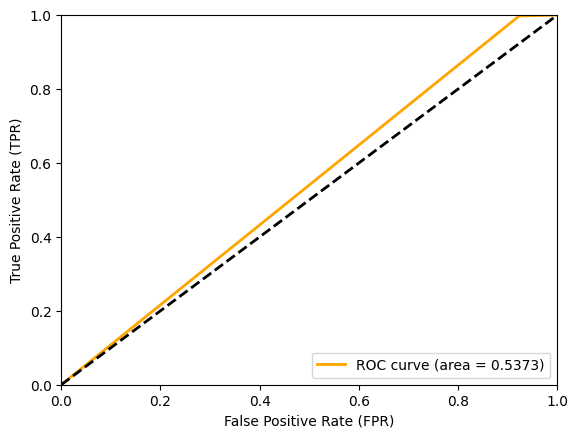

In [208]:
fpr, tpr, _ = roc_curve(Y_test, rf_bow_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
rf_bow_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {rf_bow_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## TFIDF + Random Forest

In [209]:
rf = RandomForestClassifier()
rf_tfidf_train_start = time.time()
rf.fit(X_train_review_tfidf, Y_train)
rf_tfidf_train_end = time.time()
rf_tfidf_train_time = rf_tfidf_train_end - rf_tfidf_train_start
print("bow + mnb train time : {:.4f}s".format(rf_tfidf_train_time))

# Test accuracy
rf_tfidf_train_pred = rf.predict(X_train_review_tfidf) 
rf_tfidf_predict_start = time.time()
rf_tfidf_test_pred = rf.predict(X_test_review_tfidf) # prediction from model
rf_tfidf_predict_end = time.time()
rf_tfidf_test_time = rf_tfidf_predict_end - rf_tfidf_predict_start

rf_tfidf_train_score = round(accuracy_score(Y_train, rf_tfidf_train_pred), 4)
rf_tfidf_test_score = round(accuracy_score(Y_test, rf_tfidf_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(rf_tfidf_train_score*100))
print('Test Accuracy: {:.2f}%'.format(rf_tfidf_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(rf_tfidf_test_time))

bow + mnb train time : 646.3594s
Train Accuracy: 99.89%
Test Accuracy: 96.79%
bow + mnb predict time : 7.4081s


In [210]:
rf_tfidf_precision_score = precision_score(Y_test, rf_tfidf_test_pred)
rf_tfidf_f1_score = f1_score(Y_test, rf_tfidf_test_pred)
rf_tfidf_recall_score = recall_score(Y_test, rf_tfidf_test_pred)
rf_tfidf_accuracy_score = accuracy_score(Y_test, rf_tfidf_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(rf_tfidf_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(rf_tfidf_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(rf_tfidf_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(rf_tfidf_accuracy_score*100))

bow + mnb Precision Score = 96.86%
bow + mnb f1 score = 98.36%
bow + mnb recall score = 99.91%
bow + mnb accuracy score = 96.79%


In [211]:
print(classification_report(Y_test, rf_tfidf_test_pred))

              precision    recall  f1-score   support

       False       0.66      0.05      0.09      2031
        True       0.97      1.00      0.98     59587

    accuracy                           0.97     61618
   macro avg       0.82      0.52      0.54     61618
weighted avg       0.96      0.97      0.95     61618



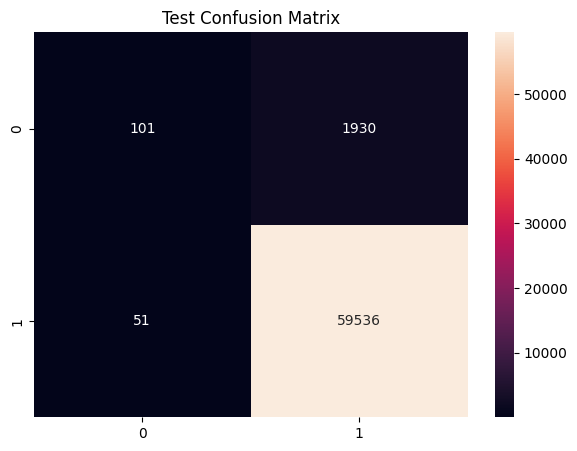

In [212]:
cm = confusion_matrix(Y_test, rf_tfidf_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

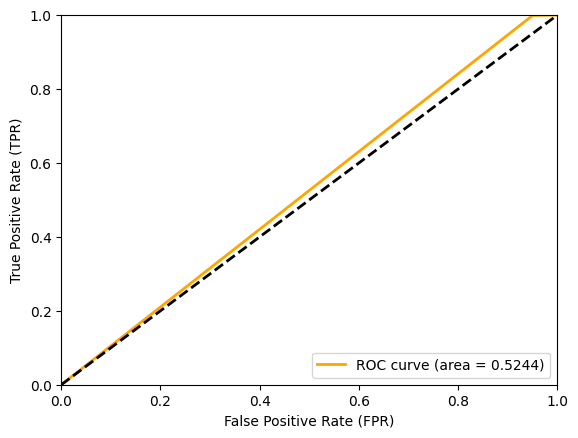

In [213]:
fpr, tpr, _ = roc_curve(Y_test, rf_tfidf_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
rf_tfidf_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {rf_tfidf_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## BOW + XGB

In [214]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_bow_train_start = time.time()
xgb.fit(X_train_review_bow, Y_train)
xgb_bow_train_end = time.time()
xgb_bow_train_time = xgb_bow_train_end - xgb_bow_train_start
print("bow + mnb train time : {:.4f}s".format(xgb_bow_train_time))

# Test accuracy
xgb_bow_train_pred = xgb.predict(X_train_review_bow) 
xgb_bow_predict_start = time.time()
xgb_bow_test_pred = xgb.predict(X_test_review_bow) # prediction from model
xgb_bow_predict_end = time.time()
xgb_bow_test_time = xgb_bow_predict_end - xgb_bow_predict_start

xgb_bow_train_score = round(accuracy_score(Y_train, xgb_bow_train_pred), 4)
xgb_bow_test_score = round(accuracy_score(Y_test, xgb_bow_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(xgb_bow_train_score*100))
print('Test Accuracy: {:.2f}%'.format(xgb_bow_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(xgb_bow_test_time))

bow + mnb train time : 2.9901s
Train Accuracy: 98.07%
Test Accuracy: 97.35%
bow + mnb predict time : 0.0541s


In [215]:
xgb_bow_precision_score = precision_score(Y_test, xgb_bow_test_pred)
xgb_bow_f1_score = f1_score(Y_test, xgb_bow_test_pred)
xgb_bow_recall_score = recall_score(Y_test, xgb_bow_test_pred)
xgb_bow_accuracy_score = accuracy_score(Y_test, xgb_bow_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(xgb_bow_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(xgb_bow_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(xgb_bow_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(xgb_bow_accuracy_score*100))

bow + mnb Precision Score = 97.70%
bow + mnb f1 score = 98.65%
bow + mnb recall score = 99.61%
bow + mnb accuracy score = 97.35%


In [216]:
print(classification_report(Y_test, xgb_bow_test_pred))

              precision    recall  f1-score   support

       False       0.73      0.31      0.44      2031
        True       0.98      1.00      0.99     59587

    accuracy                           0.97     61618
   macro avg       0.85      0.65      0.71     61618
weighted avg       0.97      0.97      0.97     61618



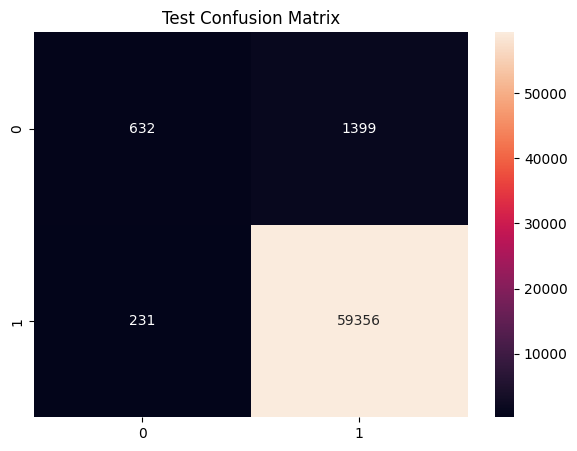

In [217]:
cm = confusion_matrix(Y_test, xgb_bow_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

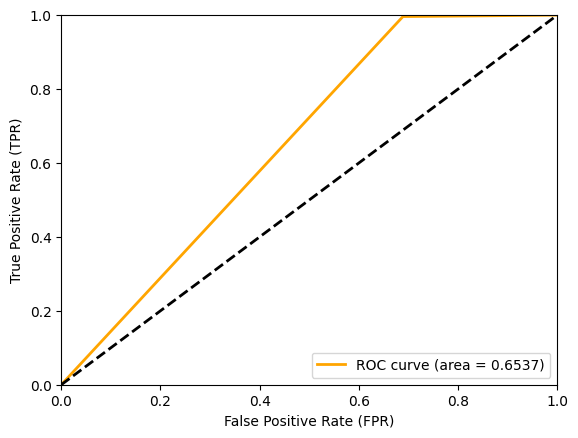

In [218]:
fpr, tpr, _ = roc_curve(Y_test, xgb_bow_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
xgb_bow_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {xgb_bow_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## TFIDF + XGB

In [219]:
xgb = XGBClassifier()
xgb_tfidf_train_start = time.time()
xgb.fit(X_train_review_tfidf, Y_train)
xgb_tfidf_train_end = time.time()
xgb_tfidf_train_time = xgb_tfidf_train_end - xgb_tfidf_train_start
print("bow + mnb train time : {:.4f}s".format(xgb_tfidf_train_time))

# Test accuracy
xgb_tfidf_train_pred = xgb.predict(X_train_review_tfidf) 
xgb_tfidf_predict_start = time.time()
xgb_tfidf_test_pred = xgb.predict(X_test_review_tfidf) # prediction from model
xgb_tfidf_predict_end = time.time()
xgb_tfidf_test_time = xgb_tfidf_predict_end - xgb_tfidf_predict_start

xgb_tfidf_train_score = round(accuracy_score(Y_train, xgb_tfidf_train_pred), 4)
xgb_tfidf_test_score = round(accuracy_score(Y_test, xgb_tfidf_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(xgb_tfidf_train_score*100))
print('Test Accuracy: {:.2f}%'.format(xgb_tfidf_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(xgb_tfidf_test_time))

bow + mnb train time : 49.1172s
Train Accuracy: 98.14%
Test Accuracy: 97.30%
bow + mnb predict time : 0.0385s


In [220]:
xgb_tfidf_precision_score = precision_score(Y_test, xgb_tfidf_test_pred)
xgb_tfidf_f1_score = f1_score(Y_test, xgb_tfidf_test_pred)
xgb_tfidf_recall_score = recall_score(Y_test, xgb_tfidf_test_pred)
xgb_tfidf_accuracy_score = accuracy_score(Y_test, xgb_tfidf_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(xgb_tfidf_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(xgb_tfidf_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(xgb_tfidf_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(xgb_tfidf_accuracy_score*100))

bow + mnb Precision Score = 97.61%
bow + mnb f1 score = 98.62%
bow + mnb recall score = 99.64%
bow + mnb accuracy score = 97.30%


In [221]:
print(classification_report(Y_test, xgb_tfidf_test_pred))

              precision    recall  f1-score   support

       False       0.73      0.29      0.41      2031
        True       0.98      1.00      0.99     59587

    accuracy                           0.97     61618
   macro avg       0.85      0.64      0.70     61618
weighted avg       0.97      0.97      0.97     61618



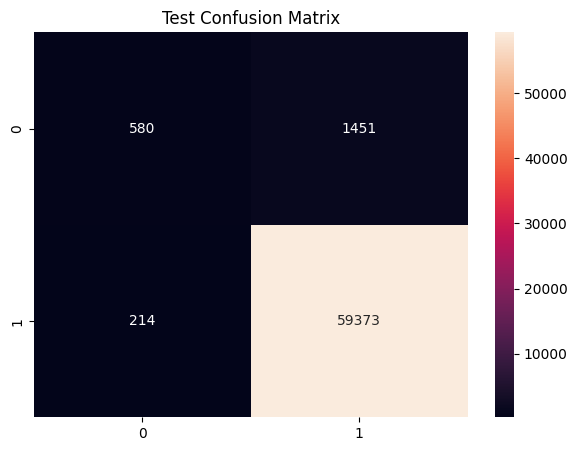

In [222]:
cm = confusion_matrix(Y_test, xgb_tfidf_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

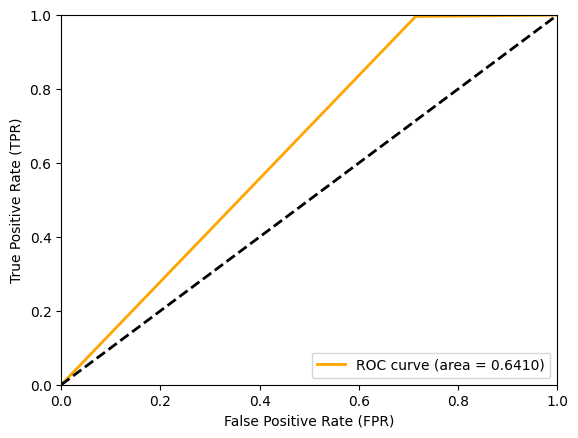

In [223]:
fpr, tpr, _ = roc_curve(Y_test, xgb_tfidf_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
xgb_tfidf_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {xgb_tfidf_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## BOW + Logistic Regression

In [240]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_bow_train_start = time.time()
lr.fit(X_train_review_bow, Y_train)
lr_bow_train_end = time.time()
lr_bow_train_time = lr_bow_train_end - lr_bow_train_start
print("bow + mnb train time : {:.4f}s".format(lr_bow_train_time))

# Test accuracy
lr_bow_train_pred = lr.predict(X_train_review_bow) 
lr_bow_predict_start = time.time()
lr_bow_test_pred = lr.predict(X_test_review_bow) # prediction from model
lr_bow_predict_end = time.time()
lr_bow_test_time = lr_bow_predict_end - lr_bow_predict_start

lr_bow_train_score = round(accuracy_score(Y_train, lr_bow_train_pred), 4)
lr_bow_test_score = round(accuracy_score(Y_test, lr_bow_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(lr_bow_train_score*100))
print('Test Accuracy: {:.2f}%'.format(lr_bow_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(lr_bow_test_time))

bow + mnb train time : 2.5641s
Train Accuracy: 98.21%
Test Accuracy: 97.52%
bow + mnb predict time : 0.0040s


c:\Users\hamouZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
lr_bow_precision_score = precision_score(Y_test, lr_bow_test_pred)
lr_bow_f1_score = f1_score(Y_test, lr_bow_test_pred)
lr_bow_recall_score = recall_score(Y_test, lr_bow_test_pred)
lr_bow_accuracy_score = accuracy_score(Y_test, lr_bow_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(lr_bow_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(lr_bow_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(lr_bow_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(lr_bow_accuracy_score*100))

bow + mnb Precision Score = 98.09%
bow + mnb f1 score = 98.73%
bow + mnb recall score = 99.37%
bow + mnb accuracy score = 97.52%


In [226]:
print(classification_report(Y_test, lr_bow_test_pred))

              precision    recall  f1-score   support

       False       0.70      0.43      0.54      2031
        True       0.98      0.99      0.99     59587

    accuracy                           0.98     61618
   macro avg       0.84      0.71      0.76     61618
weighted avg       0.97      0.98      0.97     61618



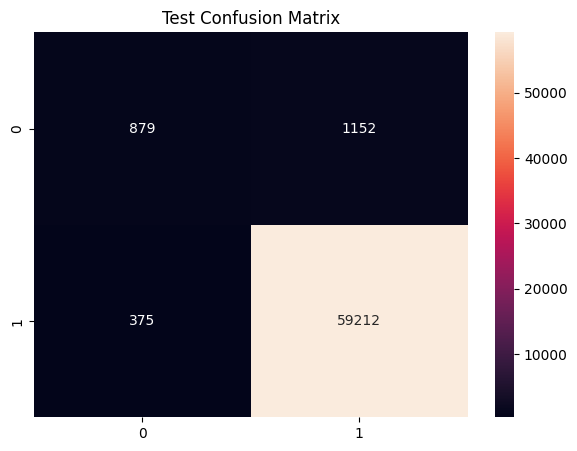

In [227]:
cm = confusion_matrix(Y_test, lr_bow_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

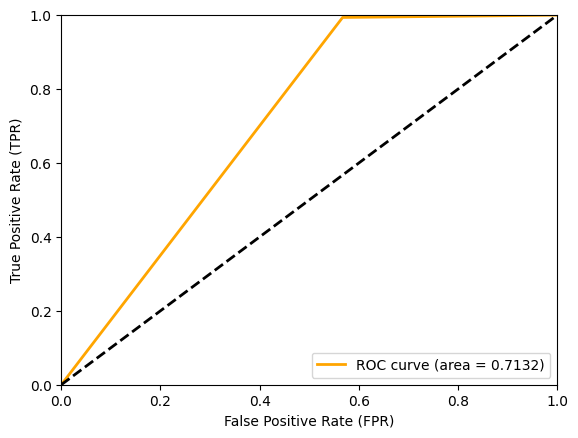

In [228]:
fpr, tpr, _ = roc_curve(Y_test, lr_bow_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
lr_bow_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {lr_bow_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## TFIDF + Logistic Regression

In [229]:
lr = LogisticRegression()
lr_tfidf_train_start = time.time()
lr.fit(X_train_review_tfidf, Y_train)
lr_tfidf_train_end = time.time()
lr_tfidf_train_time = lr_tfidf_train_end - lr_tfidf_train_start
print("bow + mnb train time : {:.4f}s".format(lr_tfidf_train_time))

# Test accuracy
lr_tfidf_train_pred = xgb.predict(X_train_review_tfidf) 
lr_tfidf_predict_start = time.time()
lr_tfidf_test_pred = xgb.predict(X_test_review_tfidf) # prediction from model
lr_tfidf_predict_end = time.time()
lr_tfidf_test_time = lr_tfidf_predict_end - lr_tfidf_predict_start

lr_tfidf_train_score = round(accuracy_score(Y_train, lr_tfidf_train_pred), 4)
lr_tfidf_test_score = round(accuracy_score(Y_test, lr_tfidf_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(lr_tfidf_train_score*100))
print('Test Accuracy: {:.2f}%'.format(lr_tfidf_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(lr_tfidf_test_time))

bow + mnb train time : 2.2118s
Train Accuracy: 98.14%
Test Accuracy: 97.30%
bow + mnb predict time : 0.0411s


c:\Users\hamouZ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [230]:
lr_tfidf_precision_score = precision_score(Y_test, lr_tfidf_test_pred)
lr_tfidf_f1_score = f1_score(Y_test, lr_tfidf_test_pred)
lr_tfidf_recall_score = recall_score(Y_test, lr_tfidf_test_pred)
lr_tfidf_accuracy_score = accuracy_score(Y_test, lr_tfidf_test_pred)

print("bow + mnb Precision Score = {:.2f}%".format(lr_tfidf_precision_score*100))
print("bow + mnb f1 score = {:.2f}%".format(lr_tfidf_f1_score*100))
print("bow + mnb recall score = {:.2f}%".format(lr_tfidf_recall_score*100))
print("bow + mnb accuracy score = {:.2f}%".format(lr_tfidf_accuracy_score*100))

bow + mnb Precision Score = 97.61%
bow + mnb f1 score = 98.62%
bow + mnb recall score = 99.64%
bow + mnb accuracy score = 97.30%


In [231]:
print(classification_report(Y_test, lr_tfidf_test_pred))

              precision    recall  f1-score   support

       False       0.73      0.29      0.41      2031
        True       0.98      1.00      0.99     59587

    accuracy                           0.97     61618
   macro avg       0.85      0.64      0.70     61618
weighted avg       0.97      0.97      0.97     61618



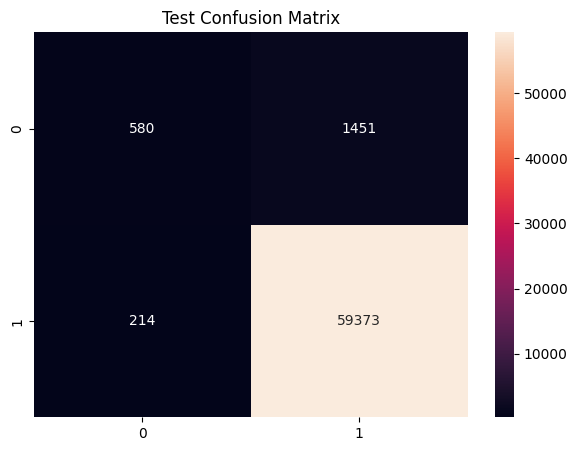

In [232]:
cm = confusion_matrix(Y_test, lr_tfidf_test_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

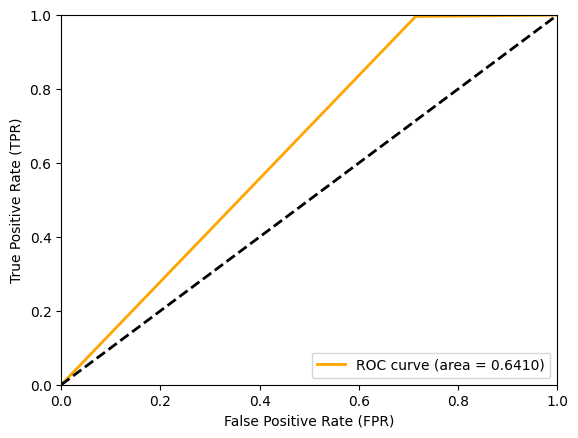

In [233]:
fpr, tpr, _ = roc_curve(Y_test, lr_tfidf_test_pred)# fpr: array of false positive rates / tpr: An array of true positive rates
lr_tfidf_roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (area = {lr_tfidf_roc_auc :.4f})")
plt.plot([0, 1], [0, 1], color="black", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

## Results

In [234]:
scores_df = pd.DataFrame(columns=["Model Name", "Train Time", "Test Time", "Train Score", "Test Score",
                                  "Accuracy", "F1", "Precision", "Recall", "ROC-AUC"])

In [235]:
from sklearn.linear_model import SGDClassifier

xgb = SGDClassifier()
xgb_bow_train_start = time.time()
xgb.fit(X_train_review_bow, Y_train)
xgb_bow_train_end = time.time()
print("bow + mnb train time : {:.4f}s".format(xgb_bow_train_end - xgb_bow_train_start))

# Test accuracy
xgb_bow_train_pred = xgb.predict(X_train_review_bow) 
xgb_bow_predict_start = time.time()
xgb_bow_test_pred = xgb.predict(X_test_review_bow) # prediction from model
xgb_bow_predict_end = time.time()

xgb_bow_train_score = round(accuracy_score(Y_train, xgb_bow_train_pred), 4)
xgb_bow_test_score = round(accuracy_score(Y_test, xgb_bow_test_pred), 4)

print('Train Accuracy: {:.2f}%'.format(xgb_bow_train_score*100))
print('Test Accuracy: {:.2f}%'.format(xgb_bow_test_score*100))
print("bow + mnb predict time : {:.4f}s".format(xgb_bow_predict_end - xgb_bow_predict_start))

bow + mnb train time : 2.8543s
Train Accuracy: 97.87%
Test Accuracy: 97.33%
bow + mnb predict time : 0.0036s


In [236]:
scores_df.loc[0] = ["MultinomialNB + TFIDF",
                    mnb_tfidf_train_time,
                    mnb_tfidf_test_time,
                    mnb_tfidf_train_score,
                    mnb_tfidf_test_score,
                    mnb_tfidf_accuracy_score,
                    mnb_tfidf_f1_score,
                    mnb_tfidf_precision_score,
                    mnb_tfidf_recall_score,
                    mnb_tfidf_roc_auc]
scores_df.loc[1] = ["MultinomialNB + BOW",
                    mnb_bow_train_time,
                    mnb_bow_test_time,
                    mnb_bow_train_score,
                    mnb_bow_test_score,
                    mnb_bow_accuracy_score,
                    mnb_bow_f1_score,
                    mnb_bow_precision_score,
                    mnb_bow_recall_score,
                    mnb_bow_roc_auc]
scores_df.loc[2] = ["Random Forest + TFIDF",
                    rf_tfidf_train_time,
                    rf_tfidf_test_time,
                    rf_tfidf_train_score,
                    rf_tfidf_test_score,
                    rf_tfidf_accuracy_score,
                    rf_tfidf_f1_score,
                    rf_tfidf_precision_score,
                    rf_tfidf_recall_score,
                    rf_tfidf_roc_auc]
scores_df.loc[3] = ["Random Forest + BOW",
                    rf_bow_train_time,
                    rf_bow_test_time,
                    rf_bow_train_score,
                    rf_bow_test_score,
                    rf_bow_accuracy_score,
                    rf_bow_f1_score,
                    rf_bow_precision_score,
                    rf_bow_recall_score,
                    rf_bow_roc_auc]
scores_df.loc[4] = ["XGB + TFIDF",
                    xgb_tfidf_train_time,
                    xgb_tfidf_test_time,
                    xgb_tfidf_train_score,
                    xgb_tfidf_test_score,
                    xgb_tfidf_accuracy_score,
                    xgb_tfidf_f1_score,
                    xgb_tfidf_precision_score,
                    xgb_tfidf_recall_score,
                    xgb_tfidf_roc_auc]
scores_df.loc[5] = ["XGB + BOW",
                    xgb_bow_train_time,
                    xgb_bow_test_time,
                    xgb_bow_train_score,
                    xgb_bow_test_score,
                    xgb_bow_accuracy_score,
                    xgb_bow_f1_score,
                    xgb_bow_precision_score,
                    xgb_bow_recall_score,
                    xgb_bow_roc_auc]
scores_df.loc[6] = ["LOGISTIC REGRESSION + TFIDF",
                    lr_tfidf_train_time,
                    lr_tfidf_test_time,
                    lr_tfidf_train_score,
                    lr_tfidf_test_score,
                    lr_tfidf_accuracy_score,
                    lr_tfidf_f1_score,
                    lr_tfidf_precision_score,
                    lr_tfidf_recall_score,
                    lr_tfidf_roc_auc]
scores_df.loc[7] = ["LOGISTIC REGRESSION + BOW",
                    lr_bow_train_time,
                    lr_bow_test_time,
                    lr_bow_train_score,
                    lr_bow_test_score,
                    lr_bow_accuracy_score,
                    lr_bow_f1_score,
                    lr_bow_precision_score,
                    lr_bow_recall_score,
                    lr_bow_roc_auc]

In [237]:
scores_df

,Model Name,Train Time,Test Time,Train Score,Test Score,Accuracy,F1,Precision,Recall,ROC-AUC
0,MultinomialNB + TFIDF,0.048070,0.005607,0.9700,0.9693,0.969327,0.984343,0.971928,0.997080,0.576088
1,MultinomialNB + BOW,0.035393,0.006017,0.9637,0.9628,0.962836,0.980684,0.985840,0.975582,0.782227
2,Random Forest + TFIDF,646.359385,7.408145,0.9989,0.9679,0.967850,0.983635,0.968601,0.999144,0.524437
3,Random Forest + BOW,589.477654,5.772983,0.9989,0.9674,0.967412,0.983393,0.969427,0.997768,0.537289
4,XGB + TFIDF,49.117200,0.038544,0.9814,0.9730,0.972979,0.986172,0.976144,0.996409,0.640991
5,XGB + BOW,2.990060,0.054054,0.9787,0.9733,0.973547,0.986455,0.976973,0.996123,0.653650
6,LOGISTIC REGRESSION + TFIDF,2.211817,0.041071,0.9814,0.9730,0.972979,0.986172,0.976144,0.996409,0.640991
7,LOGISTIC REGRESSION + BOW,2.507110,0.006341,0.9821,0.9752,0.975218,0.987270,0.980916,0.993707,0.713249


C:\Users\hamouZ\AppData\Local\Temp\ipykernel_4724\2691794207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=scores_df, x="Model Name", y="Train Time", palette='viridis')
C:\Users\hamouZ\AppData\Local\Temp\ipykernel_4724\2691794207.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=scores_df, x="Model Name", y="Test Time", palette='viridis')
C:\Users\hamouZ\AppData\Local\Temp\ipykernel_4724\2691794207.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=scores_df, x="Model Name", y="Train Score", palette='

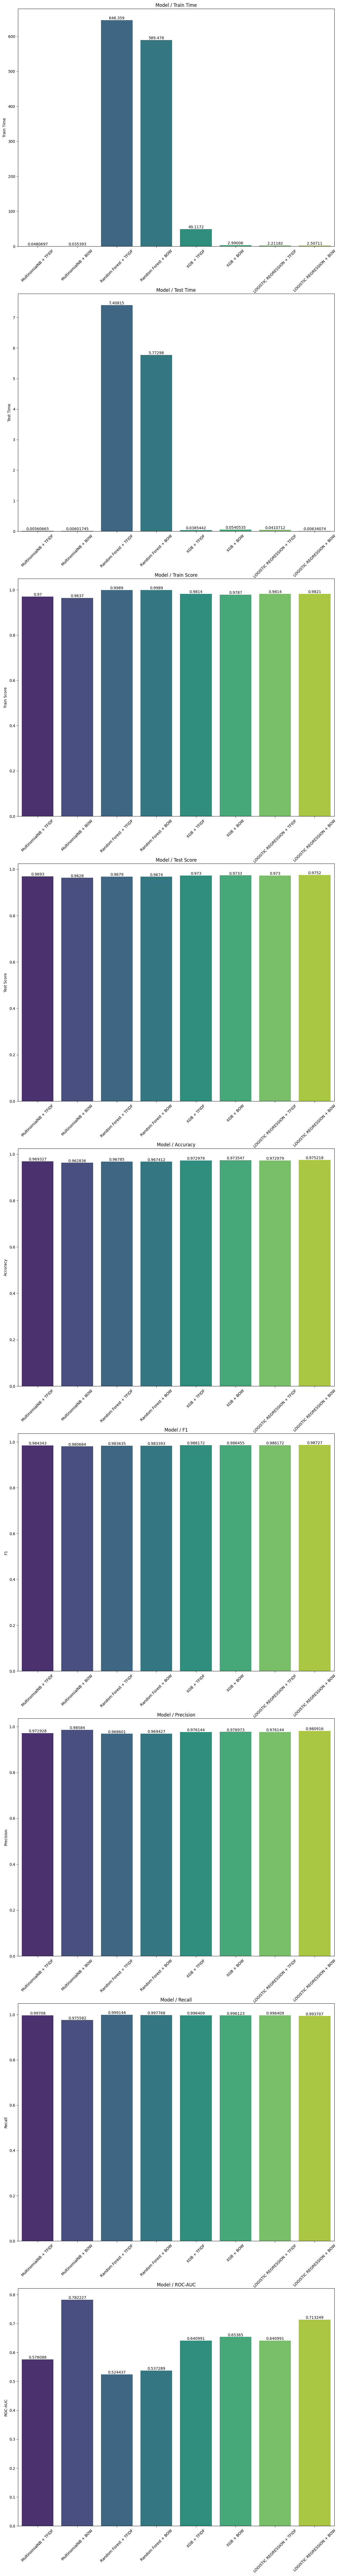

In [238]:
plt.figure(figsize=(15, 120))

plt.subplot(911)
ax = sns.barplot(data=scores_df, x="Model Name", y="Train Time", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Train Time")

plt.subplot(912)
ax = sns.barplot(data=scores_df, x="Model Name", y="Test Time", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Test Time")

plt.subplot(913)
ax = sns.barplot(data=scores_df, x="Model Name", y="Train Score", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Train Score")

plt.subplot(914)
ax = sns.barplot(data=scores_df, x="Model Name", y="Test Score", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Test Score")

plt.subplot(915)
ax = sns.barplot(data=scores_df, x="Model Name", y="Accuracy", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Accuracy")

plt.subplot(916)
ax = sns.barplot(data=scores_df, x="Model Name", y="F1", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / F1")

plt.subplot(917)
ax = sns.barplot(data=scores_df, x="Model Name", y="Precision", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Precision")

plt.subplot(918)
ax = sns.barplot(data=scores_df, x="Model Name", y="Recall", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / Recall")

plt.subplot(919)
ax = sns.barplot(data=scores_df, x="Model Name", y="ROC-AUC", palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Model / ROC-AUC")

plt.show()